In [1]:
# Demo script to load and plot ECMWF forecast open data.
import os
from datetime import datetime

# These are the five functions that you can use:
from show_forecasts.show_IFS_open_data import (
    load_forecast,
    plot_forecast,
    plot_forecast_ensemble,
)
from show_forecasts.show_IFS_open_data import (
    print_forecast_info,
    get_possible_variables,
)
from show_forecasts.data_utils import load_env_file

load_env_file()

mask_region = os.getenv("MASK_REGION", None)
use_ui_fs = os.getenv("USE_UI_FS", "")
cgan_ui_fs = True if use_ui_fs.lower() in ["t", "true", "y", "yes", "1"] else False
data_dir = os.environ["IFS_DATA_DIR"]

print("Mask Region: ", mask_region)
print("Data Dir: ", data_dir)

INFO: Loading environment variables from /home/jason/Sources/show-forecasts/.env
INFO: loaded settings from environment variables!
Mask Region:  None
Data Dir:  /home/jason/Sources/cgan-ui/store/jobs/grib2


In [2]:
# The date that the forecast was initialised
forecast_init_date = datetime(year=2024, month=6, day=20)
# Pick today instead:
# forecast_init_date = datetime.now()

# See what variables are available
get_possible_variables()

Available variables to plot are the following:
tp    - Total precipitation (mm/day)
sp    - Surface pressure (hPa)
msl   - Pressure at mean sea level (hPa)
t2m   - Two metre temperature (deg. C)
wind  - Wind speed (m/s)
ro    - Surface runoff water (m)



['tp', 'sp', 'msl', 't2m', 'wind', 'ro']

In [3]:
# Load some forecast data
# Options given by possible_variables() are
#    'sp'   - Surface pressure (hPa)
#    'msl'  - Pressure at mean sea level (hPa)
#    't2m'  - Two metre temperature (deg. C)
#    'wind' - Wind speed (m/s)
#    'tp'   - Total precipitation (mm/h)
#    'ro'   - Surface runoff water (m)
loader_args = {
    "key": "tp",
    "forecast_init_date": forecast_init_date,
    "data_dir": data_dir,
}

if mask_region is not None:
    loader_args.update({"mask_region": mask_region.title(), "cgan_ui_fs": cgan_ui_fs})

data = load_forecast(**loader_args)

Loading tp with lead time 30h.
Loading tp with lead time 54h.


In [4]:
# Print some information about the forecast
print_forecast_info(forecast_init_date)

Forecast average: 2024-06-21 06:00:00 - 2024-06-22 06:00:00
Forecast initialisation: 2024-06-20 00:00:00



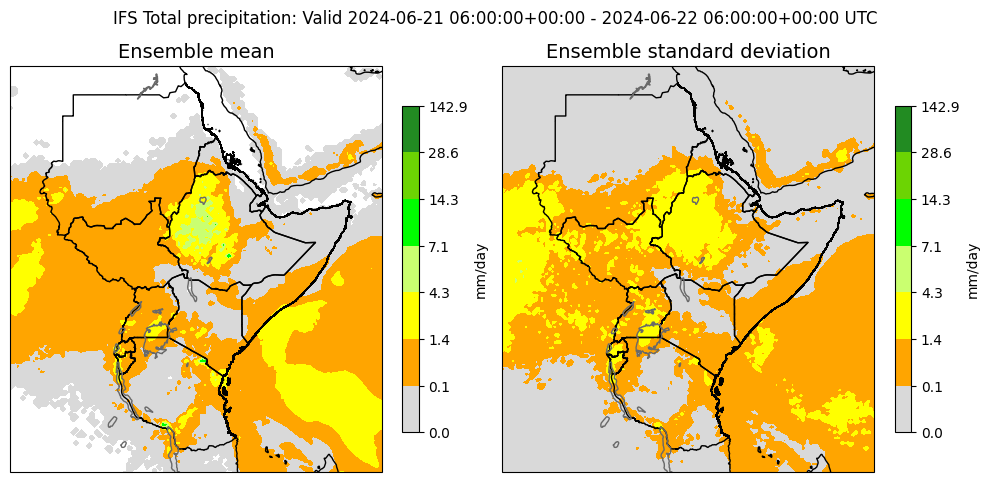

In [5]:
# Plot the current data
plot_forecast(data, plot_units="mm/day", region=mask_region)

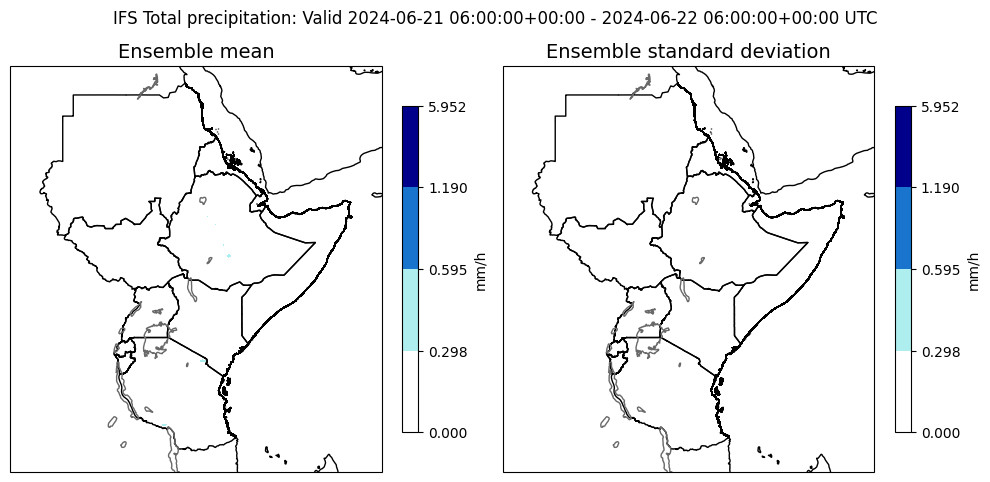

In [6]:
# style options: None (default), 'ICPAC', 'ICPAC_heavy', 'KMD', 'EMI', 'EMI_heavy'
# plot_units are only meaningfull for precipitation and can be 'mm/h' (default),
#               'mm/6h', 'mm/day' or 'mm/week'
# region can be 'ICPAC', 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
#               'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'
plot_forecast(data, style="EMI_heavy", plot_units="mm/h", region=mask_region)

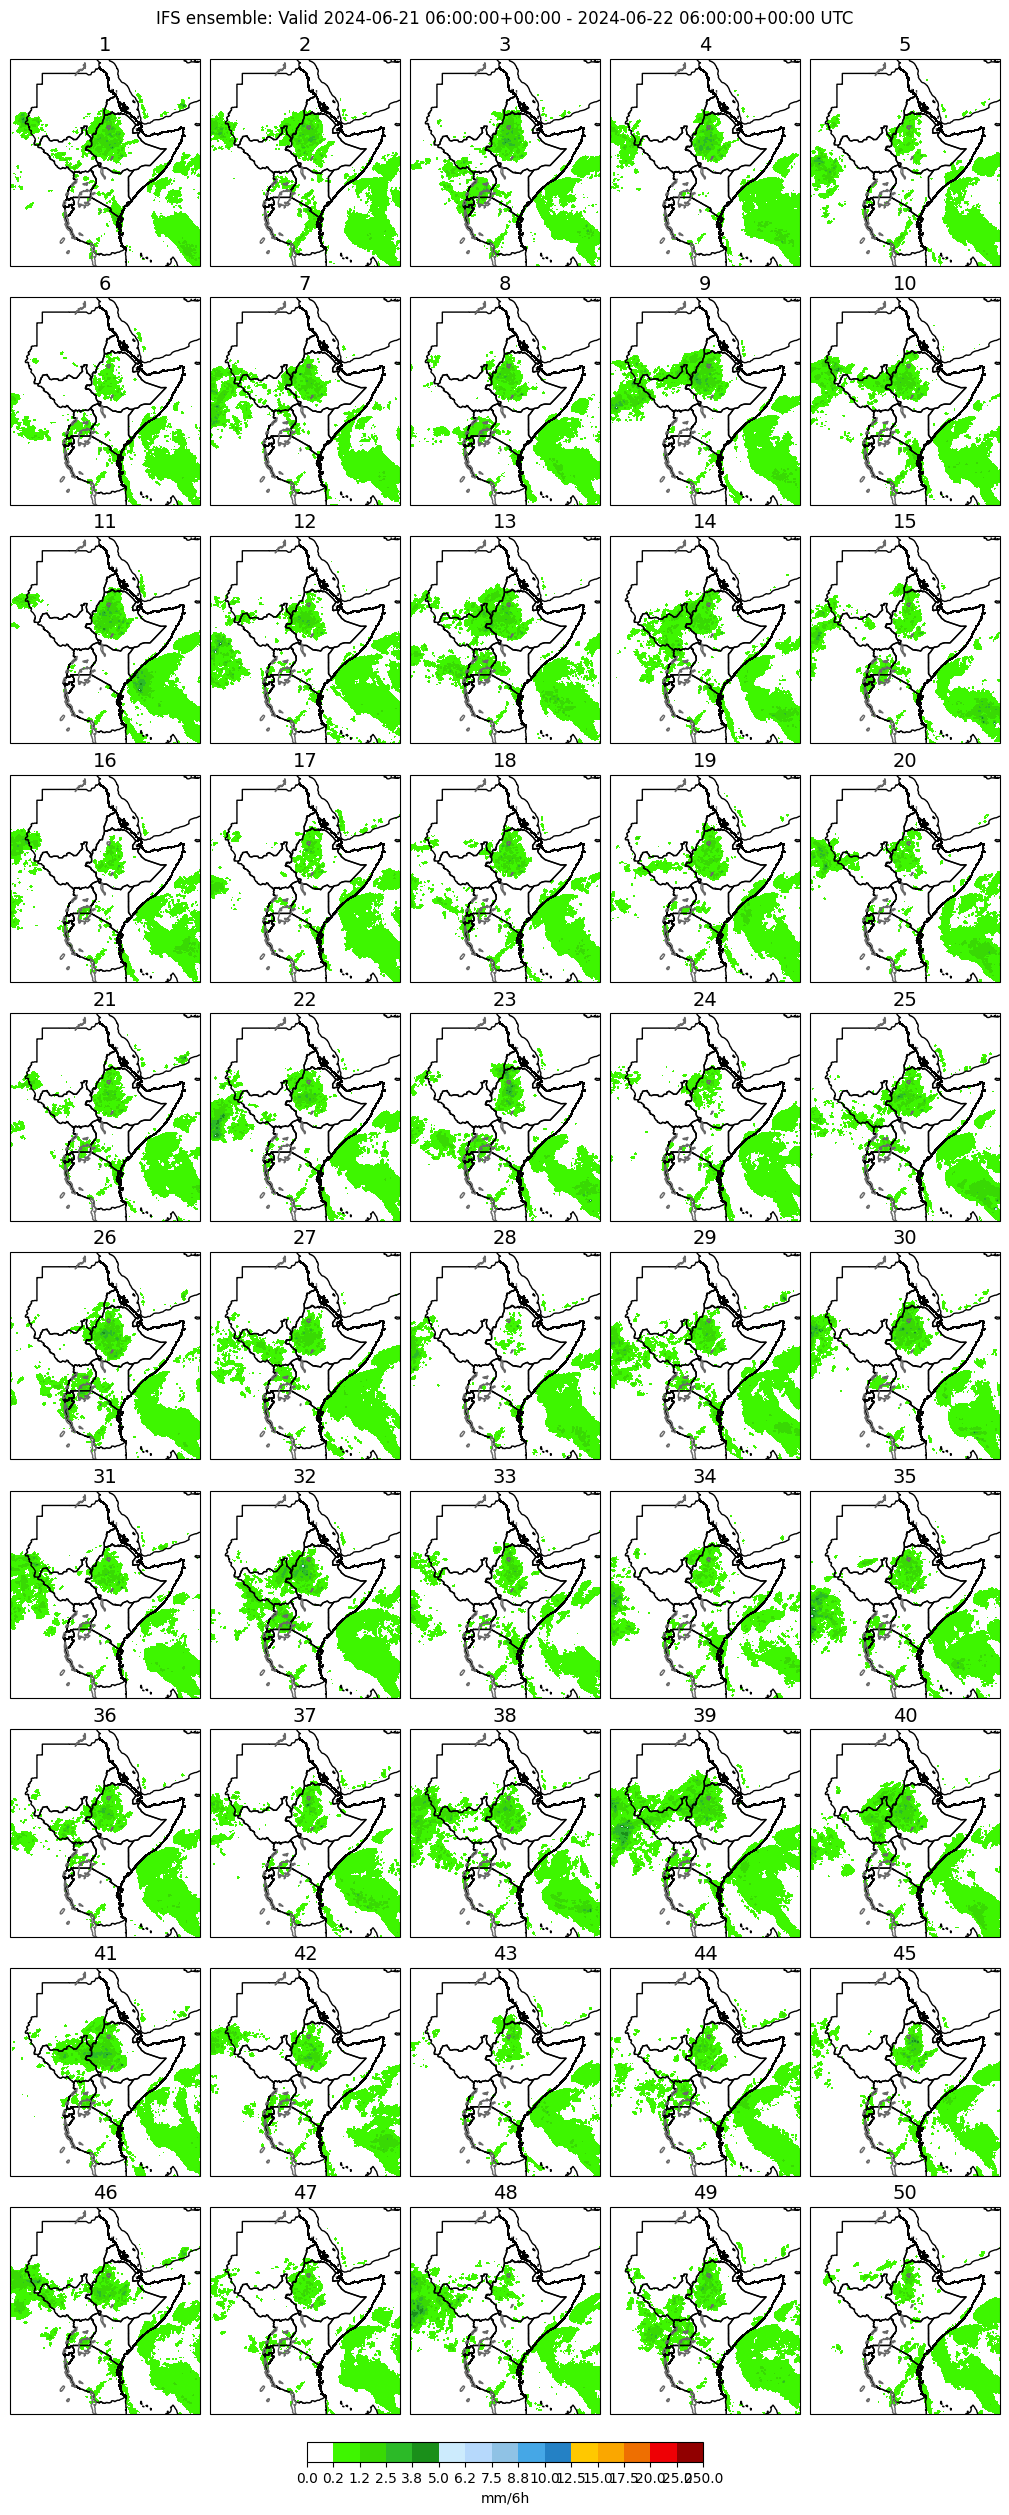

In [7]:
# Plot the ensemble
plot_forecast_ensemble(data, style="KMD", plot_units="mm/6h", region=mask_region)

Loading msl with lead time 30h.
Loading msl with lead time 33h.
Loading msl with lead time 36h.
Loading msl with lead time 39h.
Loading msl with lead time 42h.
Loading msl with lead time 45h.
Loading msl with lead time 48h.
Loading msl with lead time 51h.
Loading msl with lead time 54h.


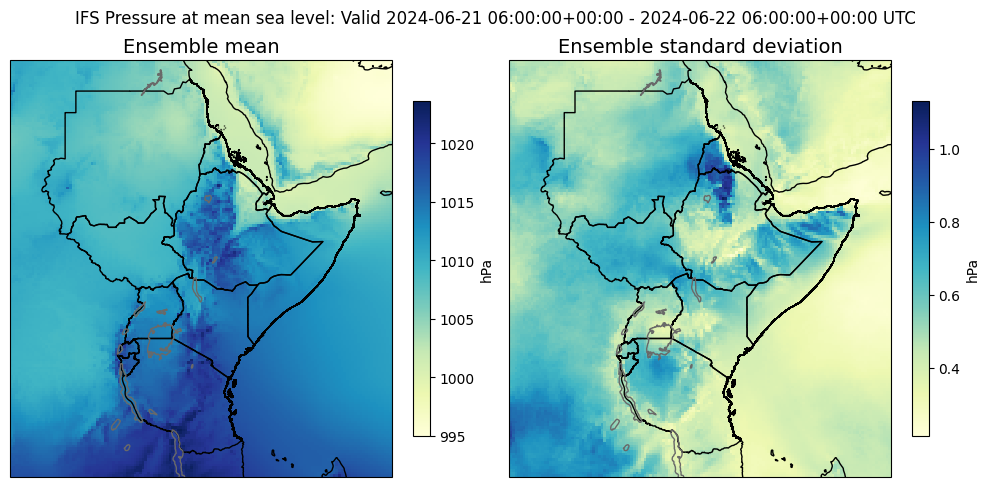

Loading t2m with lead time 30h.
Loading t2m with lead time 33h.
Loading t2m with lead time 36h.
Loading t2m with lead time 39h.
Loading t2m with lead time 42h.
Loading t2m with lead time 45h.
Loading t2m with lead time 48h.
Loading t2m with lead time 51h.
Loading t2m with lead time 54h.


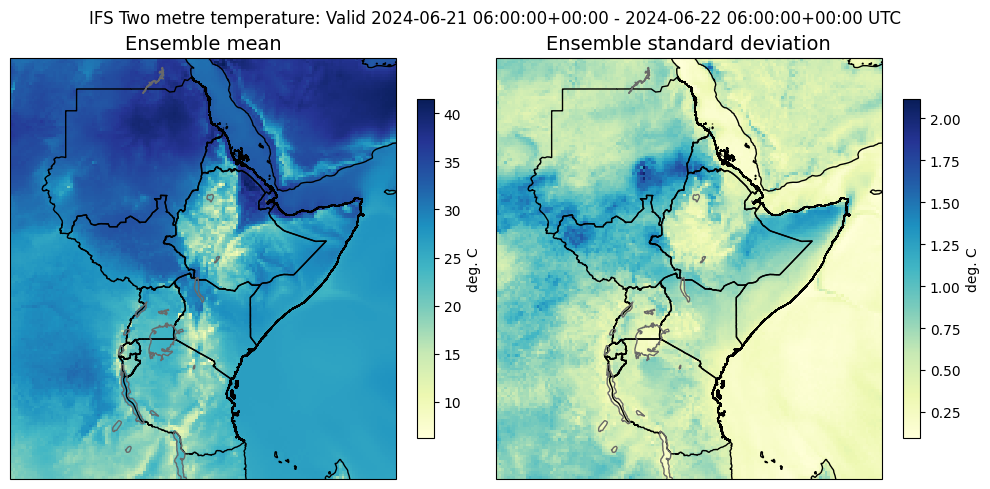

Loading wind with lead time 30h.
Loading wind with lead time 33h.
Loading wind with lead time 36h.
Loading wind with lead time 39h.
Loading wind with lead time 42h.
Loading wind with lead time 45h.
Loading wind with lead time 48h.
Loading wind with lead time 51h.
Loading wind with lead time 54h.


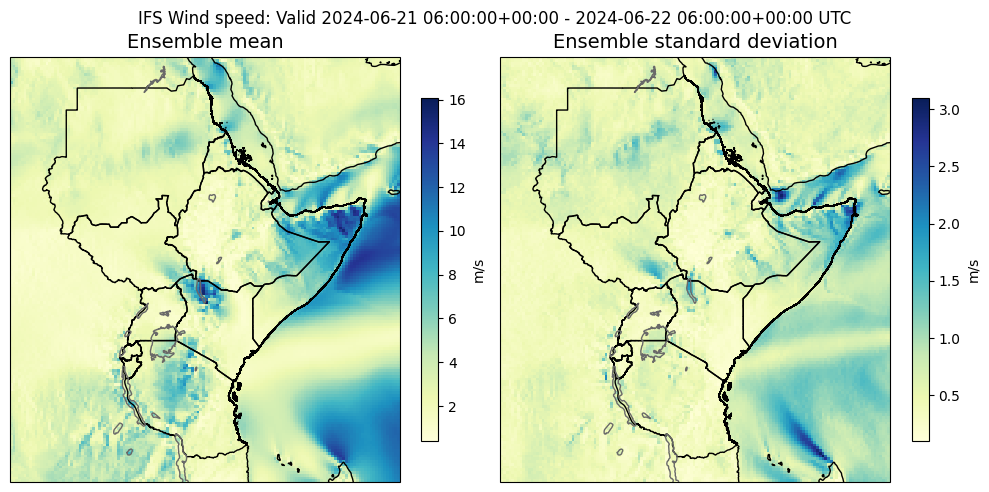

Loading tp with lead time 30h.
Loading tp with lead time 54h.


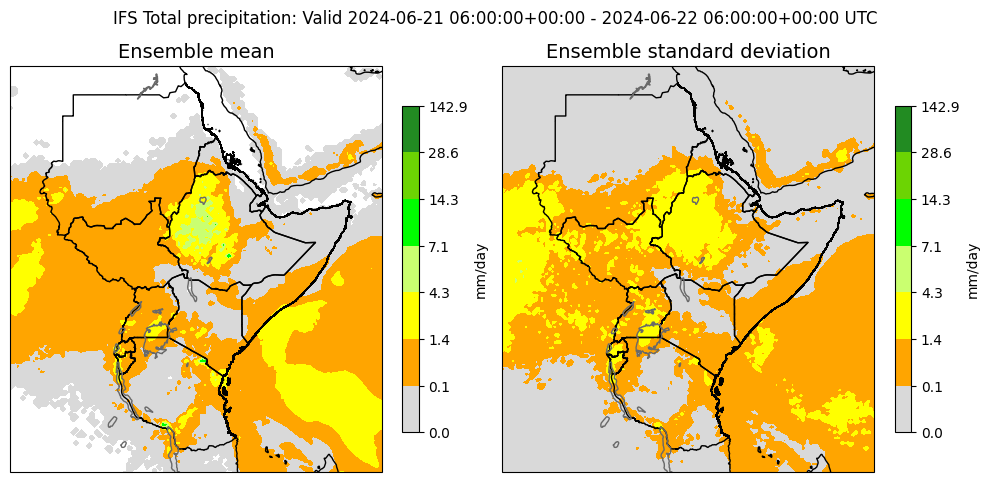

Loading ro with lead time 30h.
Loading ro with lead time 33h.
Loading ro with lead time 36h.
Loading ro with lead time 39h.
Loading ro with lead time 42h.
Loading ro with lead time 45h.
Loading ro with lead time 48h.
Loading ro with lead time 51h.
Loading ro with lead time 54h.


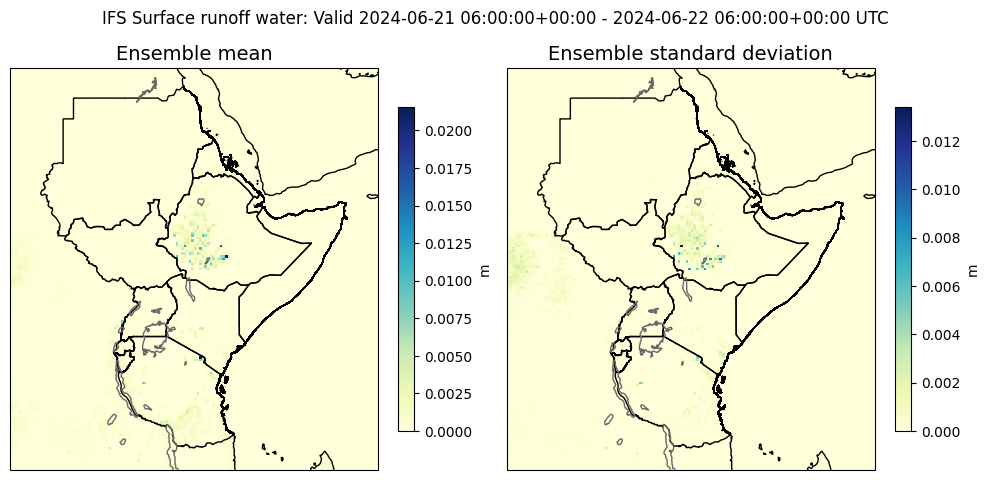

In [8]:
# Show the other variables
loader_args["key"] = "msl"
data = load_forecast(**loader_args)
plot_forecast(data, region=mask_region)

loader_args["key"] = "t2m"
data = load_forecast(**loader_args)
plot_forecast(data, region=mask_region)

loader_args["key"] = "wind"
data = load_forecast(**loader_args)
plot_forecast(data, region=mask_region)

loader_args["key"] = "tp"
data = load_forecast(**loader_args)
plot_forecast(data, region=mask_region)

loader_args["key"] = "ro"
data = load_forecast(**loader_args)
plot_forecast(data, region=mask_region)

In [9]:
#!jupyter nbconvert --to html test_load_IFS_openData.ipynb